<a href="https://colab.research.google.com/github/salwazpw/PCVK_Genap_2023/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Library**

In [5]:
# Import Library
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

# **Tugas No.3**

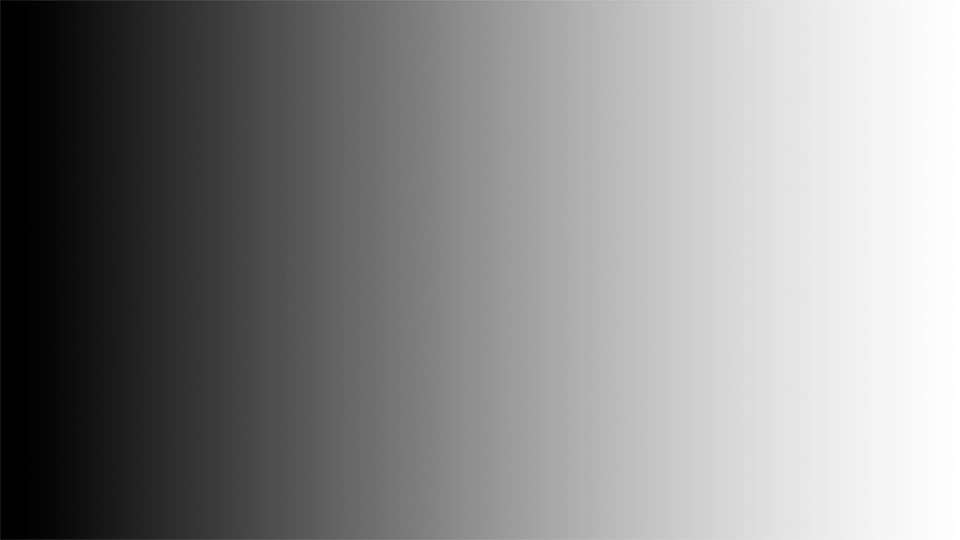

In [6]:
# Load image
img = cv.imread('/content/drive/MyDrive/PCVK/gradient.jpg')
cv2_imshow(img)

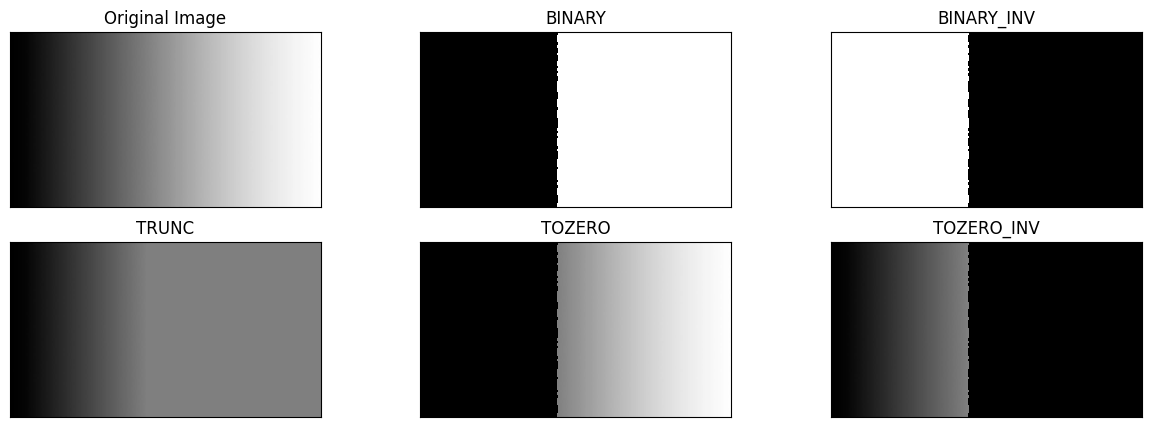

In [7]:
thresh = 127 #nilai Threshold yang ditentukan

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))

for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()

# **Tugas No.4**

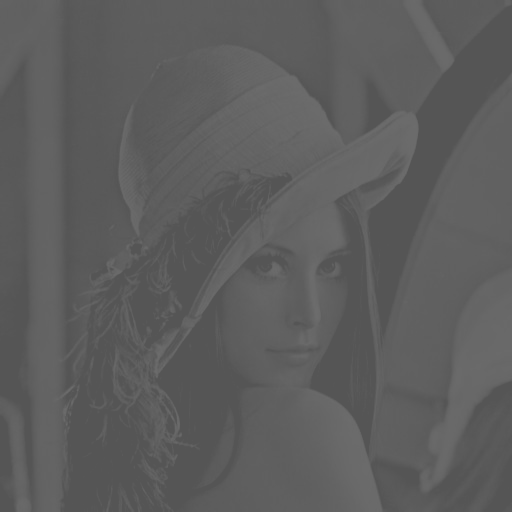

In [8]:
# Load Image Lena
img_lena = cv.imread('/content/drive/MyDrive/PCVK/lena_gs_lc2.jpg',0)
cv2_imshow(img_lena)

<ipython-input-9-1f96d2da34e5>:38: RuntimeWarning: invalid value encountered in double_scalars
  m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
<ipython-input-9-1f96d2da34e5>:38: RuntimeWarning: divide by zero encountered in double_scalars
  m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
<ipython-input-9-1f96d2da34e5>:39: RuntimeWarning: invalid value encountered in multiply
  v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2


87 255.0


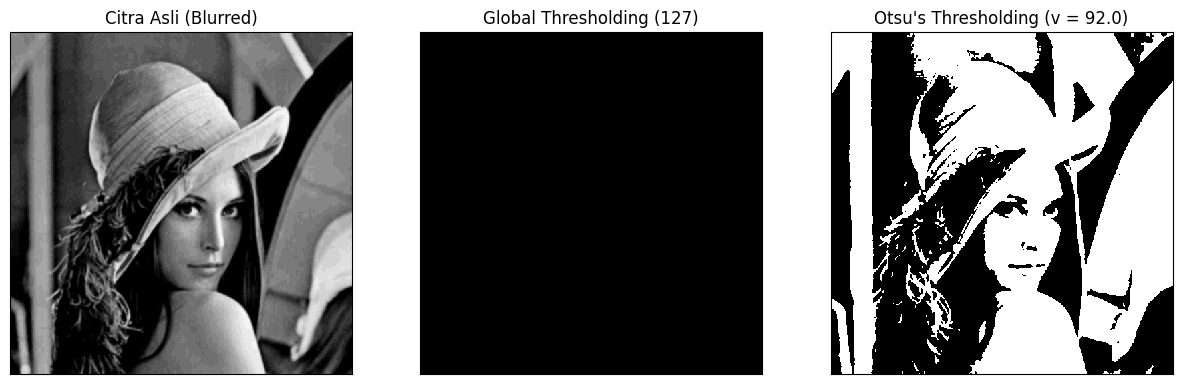

In [9]:
thresh_value = 255

img_lena_blurred = cv.GaussianBlur(img_lena,(5,5),0)
ret,thresh_lena = cv.threshold(img_lena_blurred,thresh_value,255,cv.THRESH_BINARY)

my_thresh = np.zeros(img_lena.shape, img_lena.dtype)

for i in range(img_lena.shape[0]):
  for j in range(img_lena.shape[1]):
    if img_lena[i,j] > thresh:
      my_thresh[i,j] = 1
    elif img_lena[i,j] < thresh:
      my_thresh[i,j] = 0

color_list = []
next_color_list = []

for i in range(img_lena.shape[0]):
  for j in range(img_lena.shape[1]):
    color_list.append(img_lena[i,j])

# find normalized_histogram, and its cumulative distribution function
hist = cv.calcHist([img_lena_blurred],[0],None,[256],[0,256])
hist_norm = hist.ravel()/hist.max()
Q = hist_norm.cumsum()

bins = np.arange(256)

fn_min = np.inf
otsu_thresh_value = 0

for i in range(1,256):
    p1,p2 = np.hsplit(hist_norm,[i]) # probabilities
    q1,q2 = Q[i],Q[255]-Q[i] # cum sum of classes
    b1,b2 = np.hsplit(bins,[i]) # weights

    # finding means and variances
    m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2

    # calculates the minimization function
    fn = v1*q1 + v2*q2
    if fn < fn_min:
        fn_min = fn
        otsu_thresh_value = i

# find otsu's threshold value with OpenCV function
ret2, otsu_thresh = cv.threshold(img_lena_blurred,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
print (otsu_thresh_value,ret)
    
otsu_thresh_tittle = ("Otsu's Thresholding (v = ")+str(ret2)+")"
titles_lena = ['Citra Asli (Blurred)','Global Thresholding (127)', otsu_thresh_tittle]
images_lena = [img_lena_blurred, my_thresh, otsu_thresh]
plt.figure(figsize = (15,10))


for i in range(len(images_lena)):
  plt.subplot(1,3,i+1)
  plt.imshow(images_lena[i],'gray', interpolation='nearest')
  plt.title(titles_lena[i])
  plt.xticks([]),plt.yticks([])

plt.show()

# **Tugas No.5**

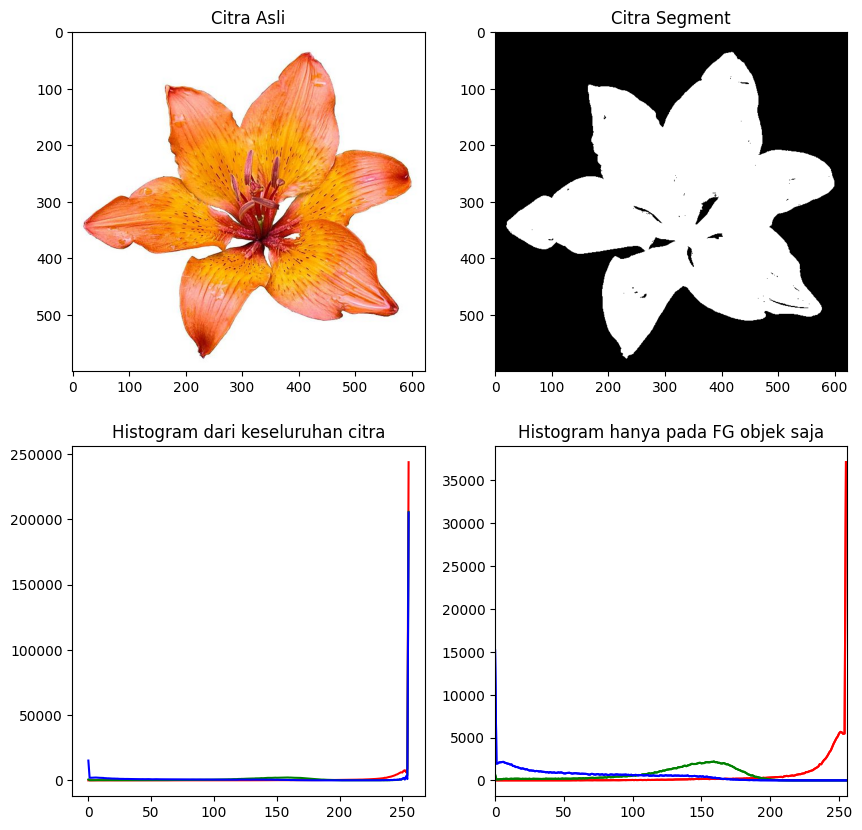

In [10]:
filename = ('/content/drive/MyDrive/PCVK/lily.jpg')

img = cv.imread(filename) 
img = cv.cvtColor(img,cv.COLOR_BGR2RGB) 
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

ret3,mask = cv.threshold(img_gray,200,255,cv.THRESH_BINARY_INV)

plt.figure(figsize = (10,10)) 
plt.subplot(2,2,1),plt.imshow(img) 
plt.title('Citra Asli') 
plt.subplot(2,2,2),plt.imshow(mask, 'gray') 
plt.title('Citra Segment') 
color = ('r','g','b') 
for i,col in enumerate(color):
    hist0 = cv.calcHist([img],[i],None,[256],[0,256]) 
    plt.subplot(2,2,3),plt.plot(hist0,color = col) 
    plt.title('Histogram dari keseluruhan citra') 
    hist1 = cv.calcHist([img],[i],mask,[256],[0,256]) 
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra') 
    hist1 = cv.calcHist([img],[i],mask,[256],[0,256]) 
    plt.subplot(2,2,4),plt.plot(hist1,color = col) 
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256]) 
plt.show()

# **Tugas No.6**

(<Axes: >, <matplotlib.image.AxesImage at 0x7fc0fc7b75e0>)

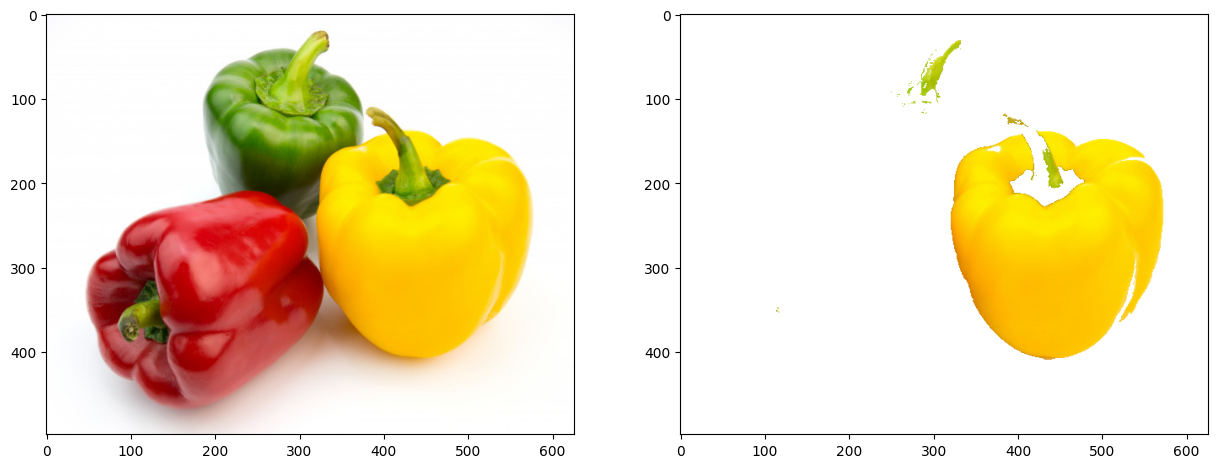

In [15]:
filename_2 = ('/content/drive/MyDrive/PCVK/peppers.jpg')
img_p = cv.imread(filename_2) 
img_rgb2 = cv.cvtColor(img_p,cv.COLOR_BGR2RGB)

pixel_values = img_rgb2.reshape((-1, 3)) 
pixel_values = np.float32(pixel_values)

# syarat berhenti iterasi dr KMeans adalah jika centroid sudah tidak terlalu banyak pergeseran posisi antara interasi sekarang dengan 
# iterasi sebelumnya (konvergen). Karena jumlah data yang besar, maka kita akan hentikan iterasi saat jumlah iterasi = 100 atau 
#epsilon(selisih antara posisi centroid skrg dgn posisi centroid di iterasi sebelumnya) <0.2

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Jika diperhatikan pada image asli, terdapat 3 warna utama (hijau, biru, dan putih/orange). Untuk percobaan ini kita akan gunakan 3 cluster untuk image ini

k = 6
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# konversi titik centroid ke dalam integer
centers = np.uint8(centers)

# flattening label array
labels = labels.flatten()

masked_image = np.copy(img_rgb2)
masked_image0 = masked_image.reshape((-1, 3))
masked_image0[labels != 1] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img_rgb2.shape)

plt.figure(figsize = (15,12))
plt.subplot(2,2,1),plt.imshow(img_rgb2)
plt.subplot(2,2,2),plt.imshow(masked_image0)

# **Tugas No.7**

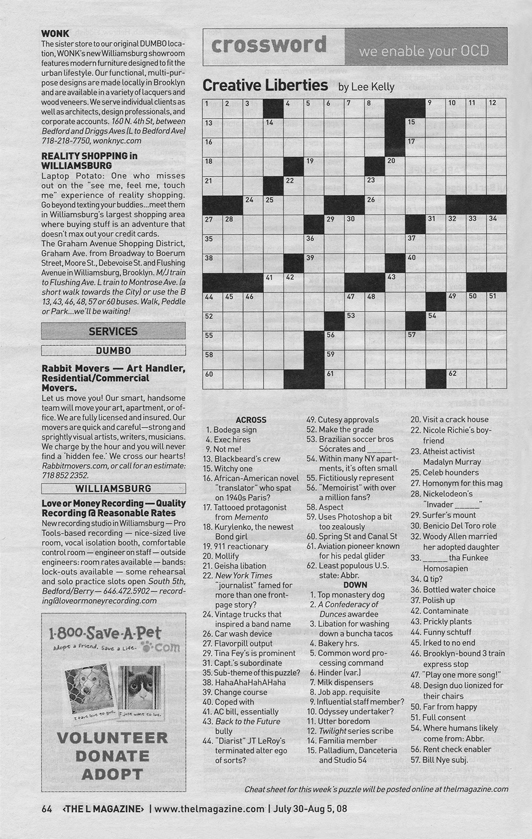

In [16]:
# Load Image Crossword
img_crossword = cv.imread('/content/drive/MyDrive/PCVK/crossword.jpg',0)
cv2_imshow(img_crossword)

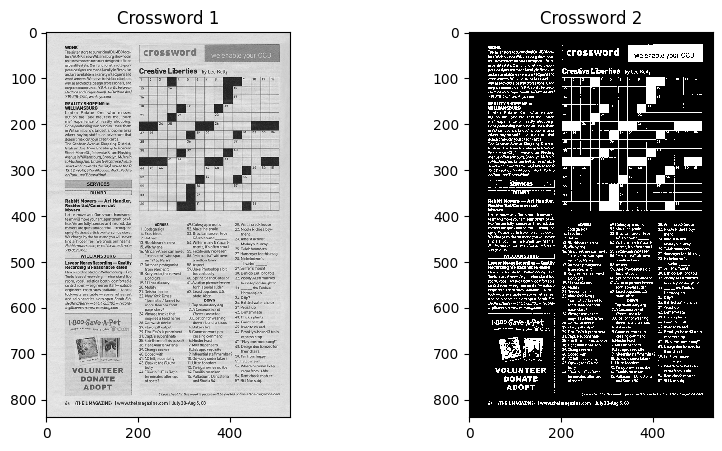

In [17]:
ret, otsu_thresh2 = cv.threshold(img_crossword,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

titles_corssword = ['Crossword 1', 'Crossword 2']
images_crossword = [img_crossword, otsu_thresh2]
plt.figure(figsize = (10,5))

for i in range(len(images_crossword)):
  plt.subplot(1,2,i+1)
  plt.imshow(images_crossword[i],'gray', interpolation='nearest')
  plt.title(titles_corssword[i])

plt.show()